**Objective and Data Description**

1. I sourced this dataset from Kaggle. The previous dataset I used, which was UN demographic data, was not a good match for this machine learning algorithm because it contained only numeric data. My new dataset is called 'Student Performance'. It tracks the grades of students in addition to many factors that may affect their academic performance, such as their sex, their class attendance, and how often they study.
    
2. My research object is to learn to utilize the Naive Baye's algorithm on my student performance dataset and see if it performs well. Since this dataset contains many categorical variables, I think that it will be a good candidate to test the Naive Baye's algorithm on.

3. My research question is to predict student's grades using their sex, their class attendance rate, and their weekly study hours.



**Statistical Numerical and Graphical Summaries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Loading in my dataset
import pandas as pd
import io
from google.colab import files
uploaded_files = files.upload()
print(uploaded_files.keys())
studentdata = pd.read_csv(io.BytesIO(uploaded_files['StudentsPerformance.csv']))

Saving StudentsPerformance.csv to StudentsPerformance.csv
dict_keys(['StudentsPerformance.csv'])


In [ ]:
#Taking a look at the dataset
print(studentdata.shape)
print(studentdata.head())
print(studentdata.describe())
types = studentdata.dtypes
print(types)
studentdata.describe()

(145, 32)
   Student Age  Sex  Graduated high-school type  Scholarship type  \
0            2    2                           3                 3   
1            2    2                           3                 3   
2            2    2                           2                 3   
3            1    1                           1                 3   
4            2    2                           1                 3   

   Additional work  Regular artistic or sports activity  \
0                1                                    2   
1                1                                    2   
2                2                                    2   
3                1                                    2   
4                2                                    2   

   Do you have a partner  Total salary if available  \
0                      2                          1   
1                      2                          1   
2                      2                          2   


,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [ ]:
#Looking at the available keys in the dataset
types = studentdata.dtypes
print(types)
print("Keys of studentdata dataset:\n", studentdata.keys())

STUDENT ID                                                           object
Student Age                                                           int64
Sex                                                                   int64
Graduated high-school type                                            int64
Scholarship type                                                      int64
Additional work                                                       int64
Regular artistic or sports activity                                   int64
Do you have a partner                                                 int64
Total salary if available                                             int64
Transportation to the university                                      int64
Accommodation type in Cyprus                                          int64
Mother's education                                                    int64
Father's education                                                    int64
Number of si

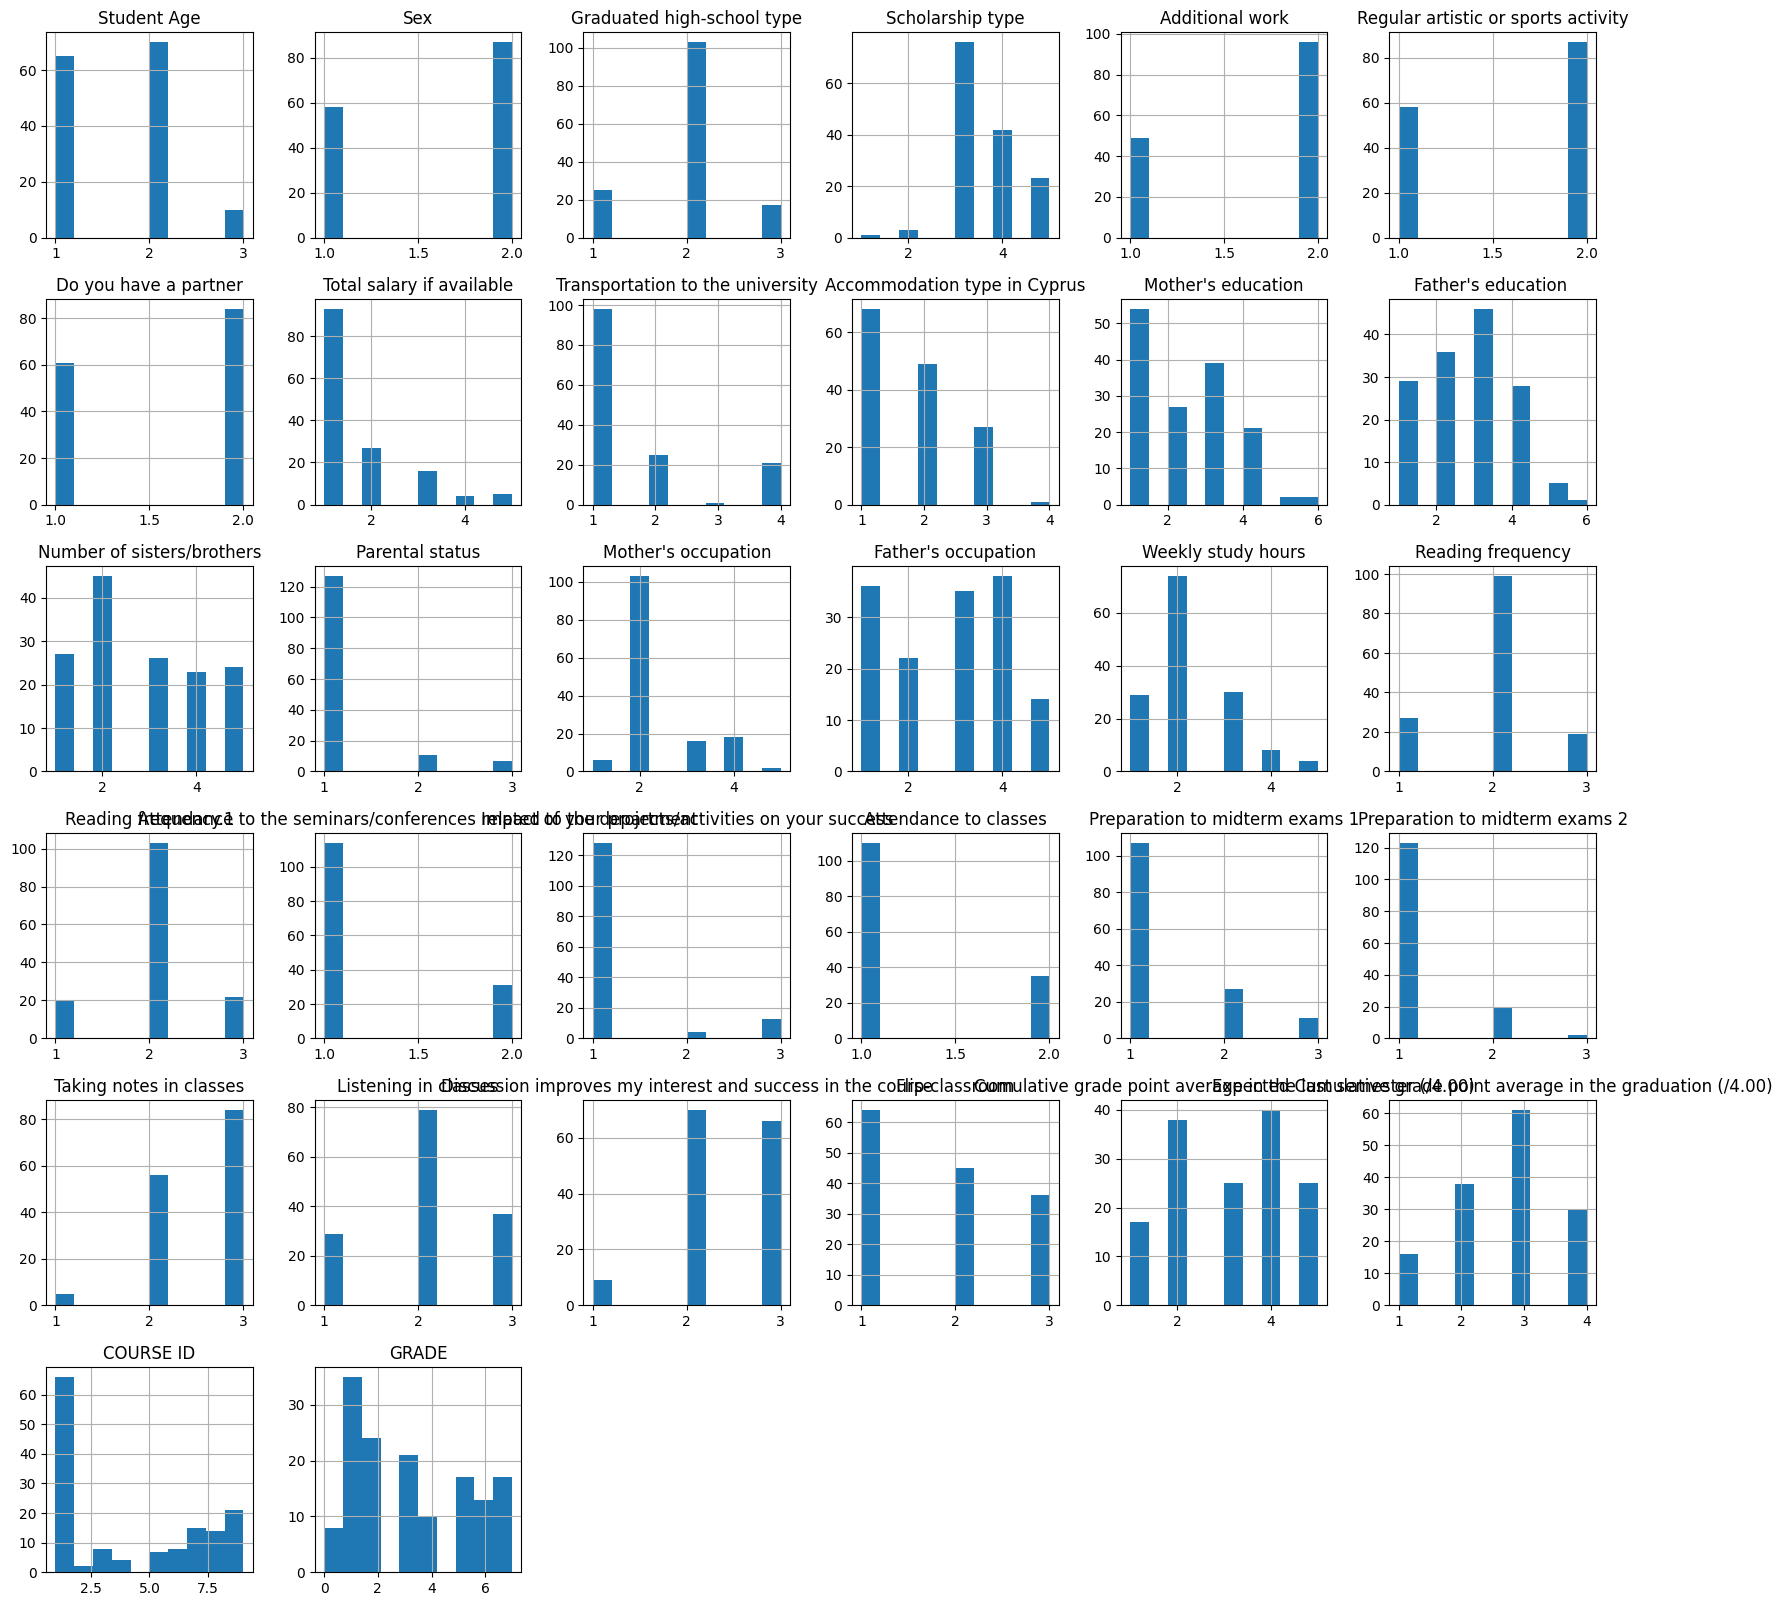

In [ ]:
#Showing histograms for each variable, which shows the distribution, spread, and skew of each variable
%matplotlib inline
studentdata.hist(figsize = (20,20))
plt.show()

**Algorithm Implementation and Statistical Tests**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Divide data into predictor features vector and the label of the target variable


X = studentdata[['Sex','Weekly study hours', 'Attendance to classes']]
y = studentdata[['GRADE']]


print(X)
print(y)

# Dividing data into two subsets training and test set. Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
print(y_pred)

# Step 6: Checking the performance of the classifier with the help of various classification mertices like accuracy
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)


     Sex  Weekly study hours  Attendance to classes
0      2                   3                      1
1      2                   2                      1
2      2                   2                      1
3      1                   3                      1
4      2                   2                      1
..   ...                 ...                    ...
140    1                   3                      1
141    1                   3                      2
142    1                   2                      1
143    1                   2                      1
144    1                   3                      1

[145 rows x 3 columns]
     GRADE
0        1
1        1
2        1
3        1
4        1
..     ...
140      5
141      5
142      1
143      4
144      3

[145 rows x 1 columns]
[7 7 3 3 7 7 3 0 7 7 0 7 3 0 7 7 7 7 7 7 3 3 7 7 3 0 7 3 3]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00    

This result shows that our model's predicted value was the same as the actual value 17% of the time

**Performance Improvement**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold = KFold(n_splits=10,random_state=7, shuffle=True)
model = GaussianNB()
results = cross_val_score(model, y_test, y_pred, cv=fold)
print(results.mean())

0.5833333333333333


<Axes: >

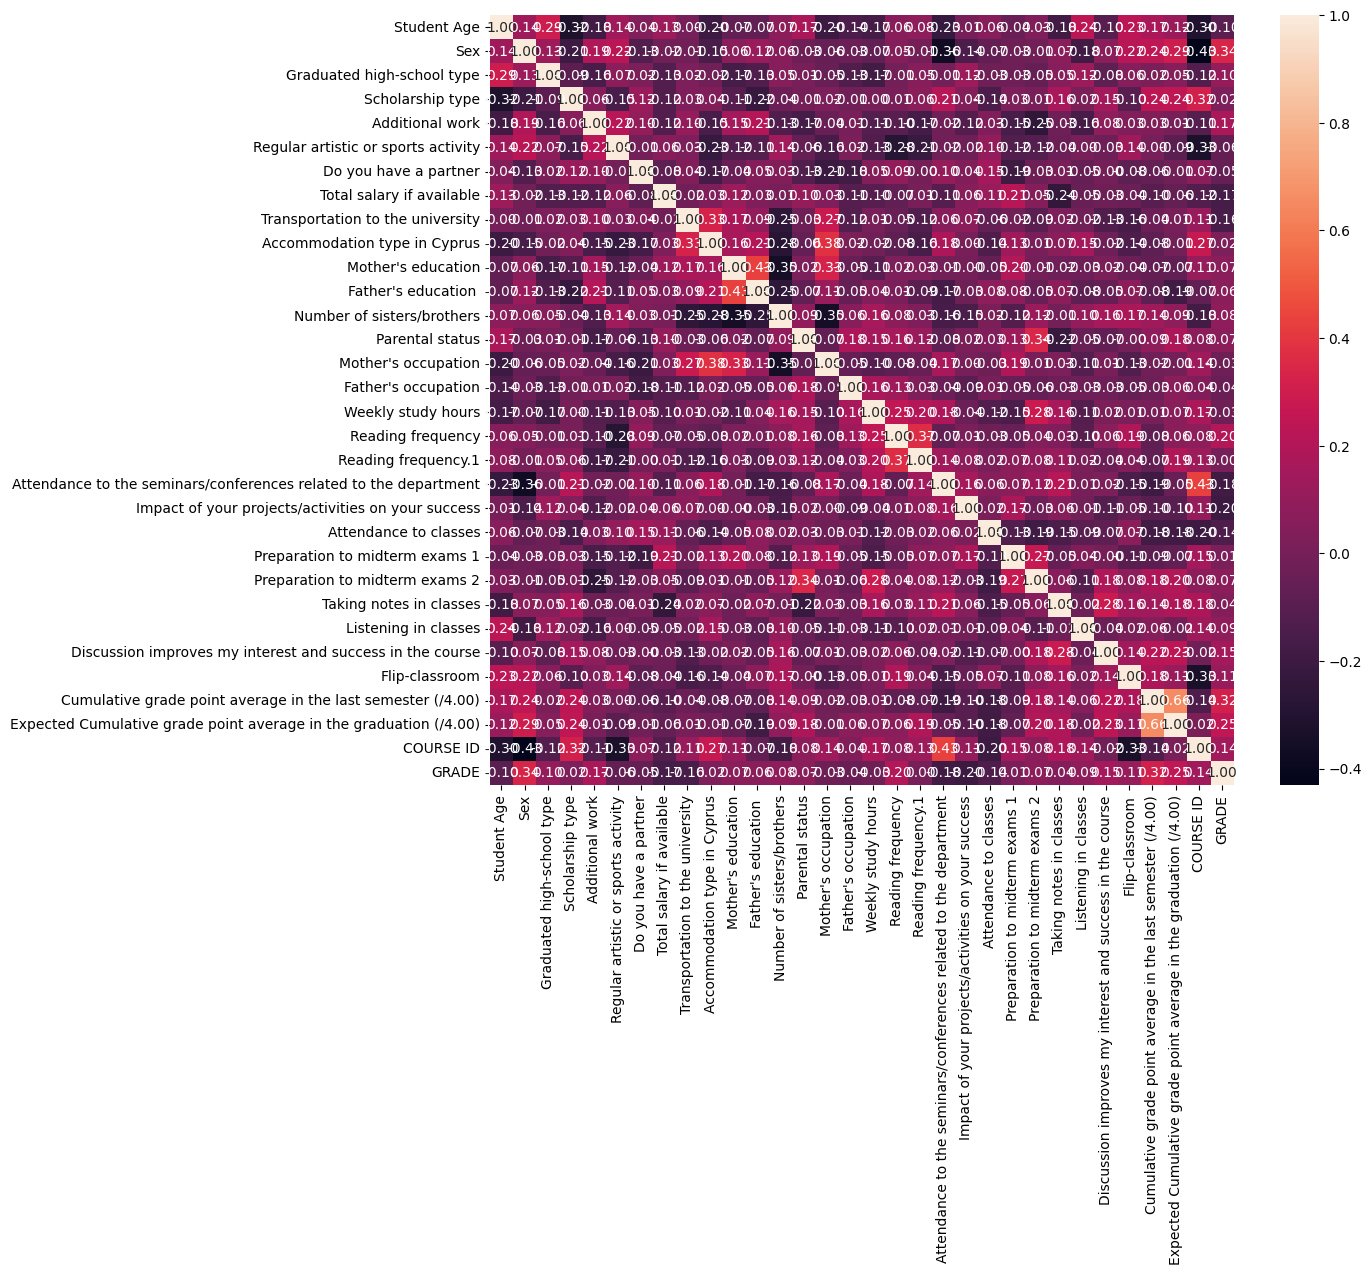

In [ ]:
studentata = pd.read_csv('StudentsPerformance.csv')
plt.figure(figsize=(12,10))
sns.heatmap(studentdata.corr(),annot=True,fmt='.2f')

In [ ]:
# Divide entire data into predictor features vector and the label of the target variable

#studentdata = studentdata.drop(columns=['STUDENT ID'.strip()])

X = studentdata.drop('GRADE', axis = 1)
y = studentdata[['GRADE']]

print(X)
print(y)


# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)



     Student Age  Sex  Graduated high-school type  Scholarship type  \
0              2    2                           3                 3   
1              2    2                           3                 3   
2              2    2                           2                 3   
3              1    1                           1                 3   
4              2    2                           1                 3   
..           ...  ...                         ...               ...   
140            2    1                           2                 3   
141            1    1                           2                 4   
142            1    1                           1                 4   
143            2    1                           2                 4   
144            1    1                           1                 5   

     Additional work  Regular artistic or sports activity  \
0                  1                                    2   
1                  1     

Our accuracy here stayed approximately the same

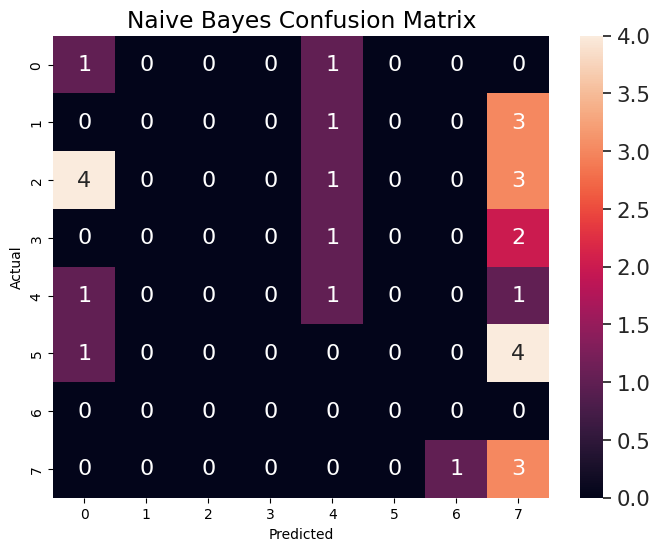

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(8),range(8))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},xticklabels=["0", "1", "2", "3", "4", "5", "6", "7"], yticklabels=["0", "1", "2", "3", "4", "5", "6", "7"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

The axis on this heat map correspond to the possible grades assigned to students: 0-7

In [ ]:
# feature selection

#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = studentdata.iloc[:,0:31]  #independent columns
y = studentdata.iloc[:,-32]    #target column

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

                                                Specs      Score
30                                          COURSE ID  35.995936
0                                         Student Age  33.404255
15                                Father's occupation   4.688892
28  Cumulative grade point average in the last sem...   4.123026
7                           Total salary if available   3.937325
9                        Accommodation type in Cyprus   3.791428
27                                     Flip-classroom   3.468837
29  Expected Cumulative grade point average in the...   3.132605
2                          Graduated high-school type   2.654177
3                                    Scholarship type   2.621611
16                                 Weekly study hours   2.162338
25                               Listening in classes   2.064662


[0.50951441 0.01092644 0.03993191 0.02832662 0.01051752 0.01401822
 0.01568318 0.01209788 0.00947961 0.03114043 0.01089244 0.014298
 0.01669114 0.00864216 0.01524959 0.0165944  0.01610021 0.01192898
 0.0105254  0.01710973 0.00850514 0.00942157 0.01084314 0.01276452
 0.01883094 0.01785092 0.01806489 0.01668952 0.01698307 0.01732558
 0.03305243]


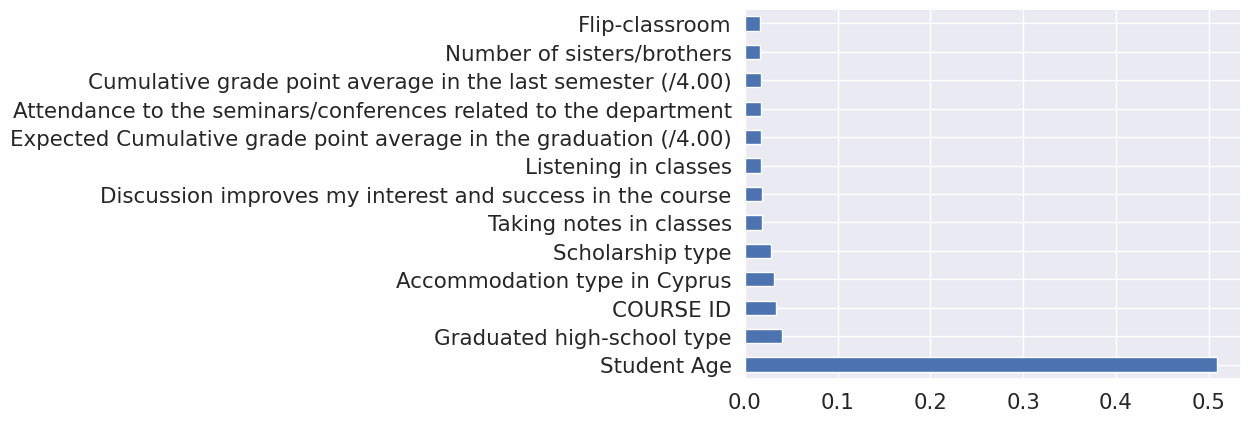

In [ ]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [ ]:
## Gather columns
# Divide data into predictor features vector and the label of the target variable 'Risk'
X = studentdata[['Student Age','COURSE ID']]
y = studentdata[['GRADE']]

print(X)
print(y)

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)



     Student Age  COURSE ID
0              2          1
1              2          1
2              2          1
3              1          1
4              2          1
..           ...        ...
140            2          9
141            1          9
142            1          9
143            2          9
144            1          9

[145 rows x 2 columns]
     GRADE
0        1
1        1
2        1
3        1
4        1
..     ...
140      5
141      5
142      1
143      4
144      3

[145 rows x 1 columns]
[1 1 6 1 1 6 1 1 1 6 6 1 1 6 1 1 1 1 1 1 1 1 1 1 1 6 1 6 1]
[[0 3 0 0 0 0 0]
 [0 6 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 5 0 0 0 1 0]
 [0 3 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 5 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.27      1.00      0.43         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         6
           5       0.00      0.00

I tried multiple variations of models using some of the higest scoring variables from the features graph and this one had the highest accuracy of the ones I tried at 20%

20.689655172413794


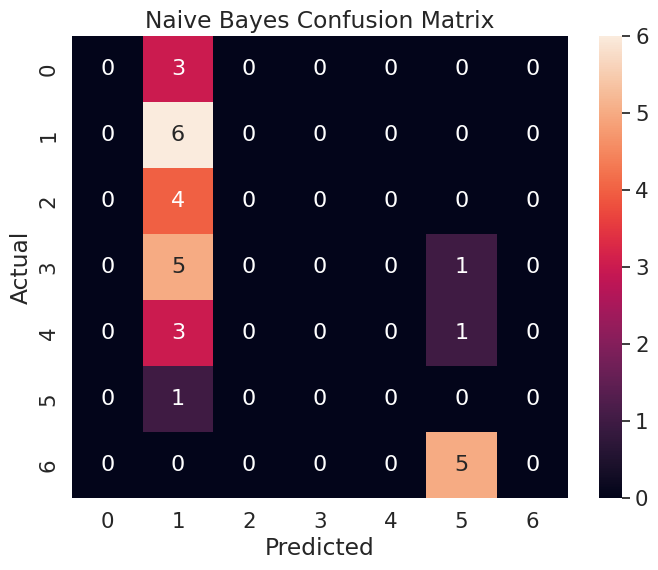

In [ ]:
#model performance - accuracy
accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(7),range(7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},xticklabels=["0", "1", "2", "3", "4", "5", "6"], yticklabels=["0", "1", "2", "3", "4", "5", "6"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

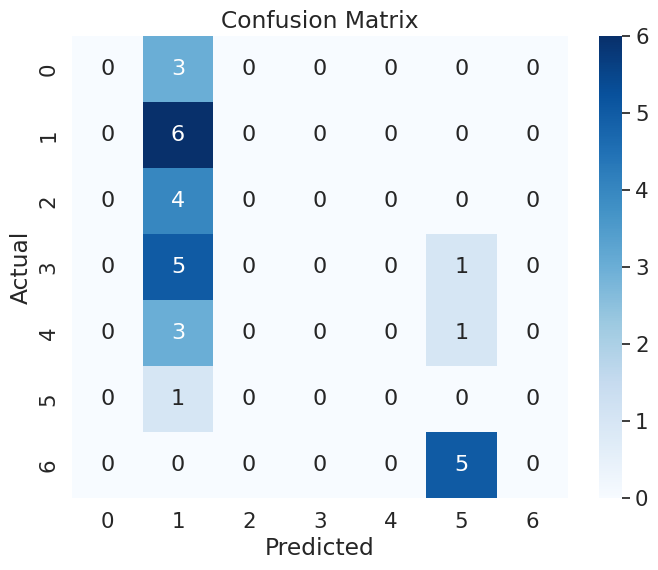

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d', cmap="Blues")

# Add labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix")

# Display the plot
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state = 0)
logistic_regression.fit(X_train, np.ravel(y_train))

print('Accuracy of logistic regression on training set: {:.2f}'.format(logistic_regression.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'.format(logistic_regression.score(X_test, y_test)))

Accuracy of logistic regression on training set: 0.18
Accuracy of logistic regression on test set: 0.14


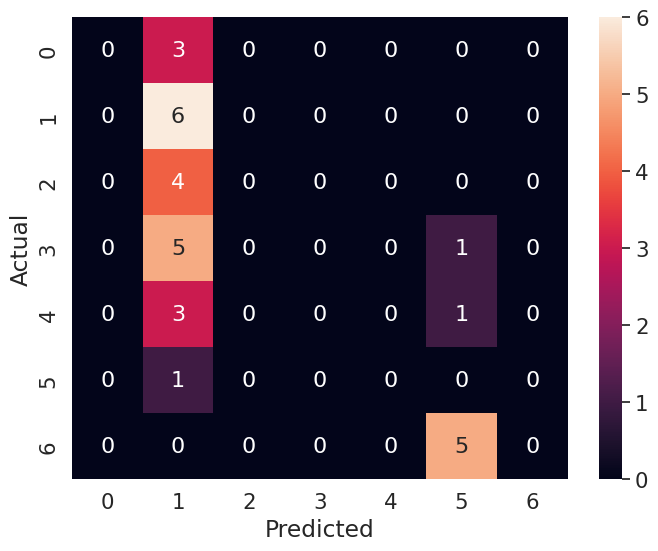

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(7),range(7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

This shows that switching to logistic regression would have a worse accuracy.

**Conclusion**

1. This project has found that a Naive Bayes alogrithm prediting a student's grade from their sex, attendance rate, and weekly study hours has an accuracy rate of 17%. After conducting a performance evaluation, a more accurate model was identified that predicted grades off of the student's age and the course they were taking. This model had an accuracy of 20%
2. In the Naive Bayes lecture, it was discussed that this algorithm does not work well for datasets that have a lot of numeric data and that it is heavily impacted by outliers. I do not believe that this dataset would be heavily impacted by these issues because the ranges of values are generally very small and essentially all of the dataset is categorical. However, I do think that a third weakness of Naive Bayes, correlated features, may be a factor in this dataset. Many of these variables could be highly correltated to one another. Students that have the foundational basis to do well in school (identified in this dataset with variables such as salary, parent's education level, accomodation type), will likely do well in many areas of school. I think that this high correlelation between variables could have led to the low accurancy ratings of my models.
3. The Naive Bayes algorithm has frequently been used on student performance data. One study that I found even used similar target variables in their study, where they created a model to predict a student's GPA based on their attendance. I would have thought that their model would have also had high correlation because one of the variables they used was grades from earlier in the semester, but they still had good results.

Razaque, F., Soomro, N., Shaikh, S. A., Soomro, S., Samo, J. A., Kumar, N., &amp; Dharejo, H. (2017). Using naïve Bayes algorithm to students’ bachelor academic performances ... https://ieeexplore.ieee.org/abstract/document/8277884

4. I think that it would be interesting to try and use a different machine learning algorthim and compare the accuracy rates to Naive Bayes. I don't think that this dataset would work well with k-nn since it doesn't have any numeric data but possibly a different algorithm in the future would work well. Additionally, it could be interesting to find a different dataset of student performance that has more numeric data and doesn't group the data into bins for each variable like this one does.